Import everything needed

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

# Import clean data 
path = 'water_potability.csv'
df = pd.read_csv(path)

In [2]:
df=df._get_numeric_data()
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
from ipywidgets import interact, interactive, fixed, interact_manual

Stats summary of dataset

In [4]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('portability')
    plt.ylabel('ugh')

    plt.show()
    plt.close()

find null value

In [6]:
df.isnull().sum()


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

replace null with mean

In [7]:
mean = df['ph'].mean()
df['ph'].replace(np.nan,mean, inplace=True)
mean1 = df['Sulfate'].mean()
df['Sulfate'].replace(np.nan,mean, inplace=True)
mean2 = df['Trihalomethanes'].mean()
df['Trihalomethanes'].replace(np.nan,mean, inplace=True)

In [8]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Find Outliner for ph

<AxesSubplot:xlabel='Potability', ylabel='ph'>

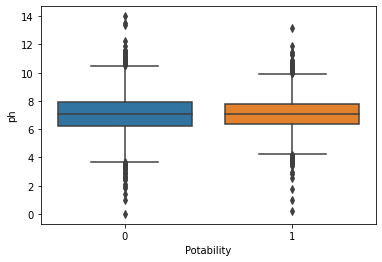

In [9]:
sns.boxplot(x= 'Potability', y='ph', data = df)

find out if any of the following correlated to price

In [10]:
df.corr()['Potability'].sort_values()

Organic_carbon    -0.030001
Hardness          -0.013837
Conductivity      -0.008128
ph                -0.003287
Turbidity          0.001581
Sulfate            0.011417
Trihalomethanes    0.020349
Chloramines        0.023779
Solids             0.033743
Potability         1.000000
Name: Potability, dtype: float64

machine learning

In [11]:
y_data = df['Potability']
x_data=df.drop('Potability',axis=1)

split dataset

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.4, random_state=1)

In [19]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [20]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg.score(x_test, y_test)

0.6071700991609459

In [21]:
kneighbor = KNeighborsClassifier()
kneighbor.fit(x_train, y_train)
kneighbor.score(x_test, y_test)

0.6155606407322655

In [23]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt.score(x_test, y_test)

0.5911517925247902